 # Melbourne Housing Market (L1 & L2 Regularization) #

In [142]:
# 1.Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
# 2.Load the data
df = pd.read_csv("/Users/rameshchidurala/Documents/DSC-530 Assignments/archive-9/Melbourne_housing_FULL.csv")

In [144]:
df.shape

(34857, 21)

### Data Exploration ###

The df.shape function describes the shape of the data. From the above results we can say that it has 34857 observations and 21 columns.

In [145]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

The df.nunique function gives the number of unique obsevations in each variable. 
We can see no of unique obsevations of each variable for this dataset from above results.

We are going to remove some features that are not useful for the price prediction such as 'Address' it has 34009 unique obsevations from above results and it does not helpful for our purpose likewise we are ignoring Longtitude, Lattitude, Postcode .

In [146]:
#Let's use limited columns (feature) which makes more sense for serving our purpose
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount', 'YearBuilt',
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
df=df[cols_to_use]

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Rooms          34857 non-null  int64  
 2   Type           34857 non-null  object 
 3   Method         34857 non-null  object 
 4   SellerG        34857 non-null  object 
 5   Regionname     34854 non-null  object 
 6   Propertycount  34854 non-null  float64
 7   YearBuilt      15551 non-null  float64
 8   Distance       34856 non-null  float64
 9   CouncilArea    34854 non-null  object 
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  Price          27247 non-null  float64
dtypes: float64(9), int64(1), object(6)
memory usage: 4.3+ MB


Now we have 16 variables. from above results.

In [148]:
# Display the first 10 rows of the Data
print("First 10 rows of the DataFrame:")
print (df.head(10))

First 10 rows of the DataFrame:
       Suburb  Rooms Type Method  SellerG             Regionname  \
0  Abbotsford      2    h     SS   Jellis  Northern Metropolitan   
1  Abbotsford      2    h      S   Biggin  Northern Metropolitan   
2  Abbotsford      2    h      S   Biggin  Northern Metropolitan   
3  Abbotsford      3    u     VB   Rounds  Northern Metropolitan   
4  Abbotsford      3    h     SP   Biggin  Northern Metropolitan   
5  Abbotsford      3    h     PI   Biggin  Northern Metropolitan   
6  Abbotsford      4    h     VB   Nelson  Northern Metropolitan   
7  Abbotsford      4    h     SN   Nelson  Northern Metropolitan   
8  Abbotsford      2    h      S   Biggin  Northern Metropolitan   
9  Abbotsford      2    h      S  Collins  Northern Metropolitan   

   Propertycount  YearBuilt  Distance         CouncilArea  Bedroom2  Bathroom  \
0         4019.0        NaN       2.5  Yarra City Council       2.0       1.0   
1         4019.0        NaN       2.5  Yarra City Council

### 3.Performing Univariate analysis using describe() function ###

In [149]:
# Calculate summary statistics
print(df.describe())

              Rooms  Propertycount     YearBuilt      Distance      Bedroom2  \
count  34857.000000   34854.000000  15551.000000  34856.000000  26640.000000   
mean       3.031012    7572.888306   1965.289885     11.184929      3.084647   
std        0.969933    4428.090313     37.328178      6.788892      0.980690   
min        1.000000      83.000000   1196.000000      0.000000      0.000000   
25%        2.000000    4385.000000   1940.000000      6.400000      2.000000   
50%        3.000000    6763.000000   1970.000000     10.300000      3.000000   
75%        4.000000   10412.000000   2000.000000     14.000000      4.000000   
max       16.000000   21650.000000   2106.000000     48.100000     30.000000   

           Bathroom           Car       Landsize  BuildingArea         Price  
count  26631.000000  26129.000000   23047.000000   13742.00000  2.724700e+04  
mean       1.624798      1.728845     593.598993     160.25640  1.050173e+06  
std        0.724212      1.010771    3398.

## 4. The summary statistics of the dataset provide valuable insights into the Melbourne housing market. Here's an interpretation of the results: ##

Rooms:
The average number of rooms per property is about 3, with a standard deviation of approximately 0.97, indicating moderate variability.
The range is from 1 to 16 rooms, which suggests a wide variety of property sizes.
Propertycount:
This likely represents the number of properties in the area.
The average count is around 7,573, with a large standard deviation, indicating significant variation in property numbers across different areas.
YearBuilt:
The average year properties were built is around 1965.
The range from 1196 to 2106 indicates possible data entry errors (e.g., future years like 2106 or very old years like 1196).
Distance:
The average distance from the city center is approximately 11.18 km.
The values range from 0 to 48.1 km, showing both central and quite remote properties.
Bedroom2 (likely similar to 'Rooms'):
The average number of bedrooms is around 3, similar to 'Rooms'.
The range and standard deviation are also similar to 'Rooms', indicating consistency in these measurements.
Bathroom:
On average, properties have about 1.62 bathrooms.
The range is from 0 to 12, showing diversity in bathroom numbers.
Car:
The average number of car spaces is approximately 1.73.
The maximum of 26 car spaces is exceptionally high and could be an outlier or a data error.
Landsize:
The average land size is around 594 square meters.
There's a large range (up to 433,014 square meters) with a high standard deviation, indicating significant variability in property land sizes.
BuildingArea:
The average building area is about 160 square meters.
The maximum building area is extremely high at 44,515 square meters, which might be an outlier or error.
Price:
The average price is approximately $1,050,173.
Prices range significantly from $85,000 to $11,200,000, indicating a wide range of property values in the dataset.
From these statistics, we can infer a diverse range of properties in the dataset, from small to very large, from central to remote, and across a wide range of prices. The presence of outliers or possible data errors, particularly in 'YearBuilt', 'Car', 'Landsize', and 'BuildingArea', suggests a need for careful data cleaning and validation.

Dropping the duplicates of the data.

In [150]:
df.drop_duplicates(inplace=True)

In [151]:
df.shape

(34666, 16)

## 5. Scatter plot of the columns to visualize the  outliers using seaborn library ## 

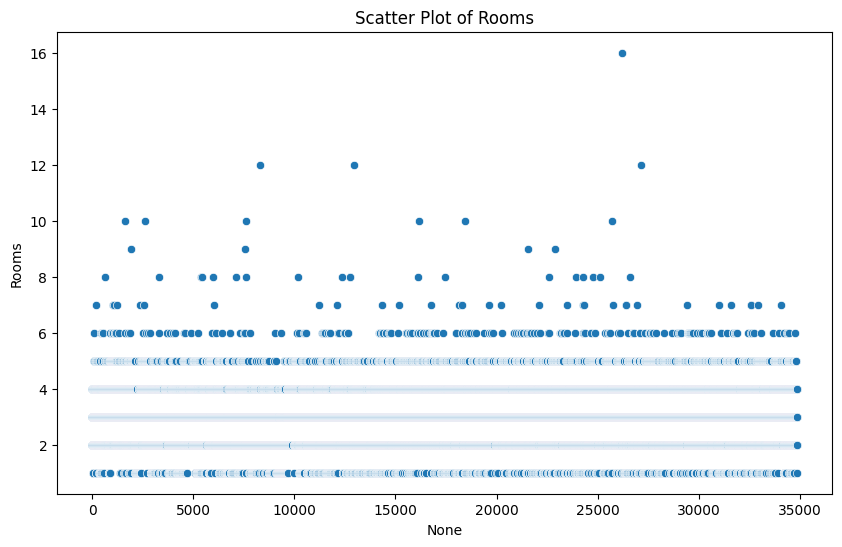

In [152]:
import seaborn as sns

# Function to plot scatter plot for a given column
def plot_scatter(df, col, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=df.index, y=col)
    plt.title(title)
    plt.ylabel(col)

    plt.show()

# Plotting scatter plot for 'Rooms'
plot_scatter(df, 'Rooms', 'Scatter Plot of Rooms')


The scatter plot for the 'Rooms' column shows that most of the data points are clustered between 1 to 8 rooms, which seems normal for a residential dataset. However, there are a few data points with a significantly higher number of rooms (up to 16), which stand out as potential outliers. These outliers could be due to large properties like mansions or errors in data entry.

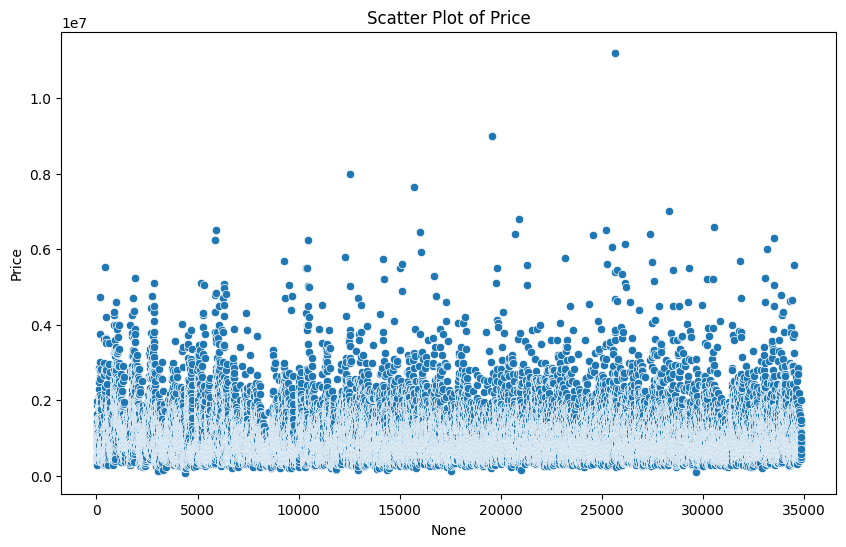

In [153]:
# Plotting scatter plot for 'Price'
plot_scatter(df, 'Price', 'Scatter Plot of Price')


The scatter plot for the 'Price' column reveals a concentration of data points in the lower price range, with a few points extending much higher, indicating potential outliers. These outliers might represent high-value properties such as luxury homes. It's also possible that some of these outliers are due to irregularities in the data.

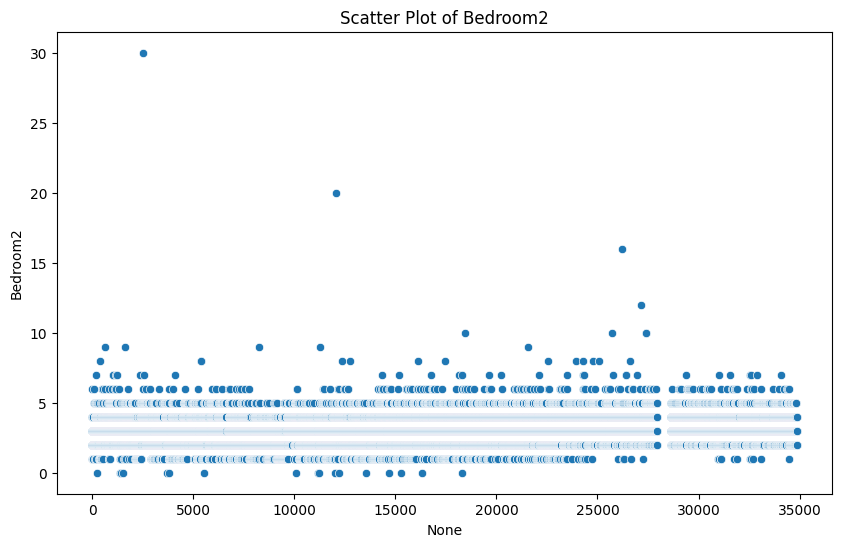

In [154]:
# Plotting scatter plot for 'Bedroom2'
plot_scatter(df, 'Bedroom2', 'Scatter Plot of Bedroom2')


The scatter plot for the 'Bedroom2' column shows a similar pattern to the 'Rooms' column, with most data points clustering in the lower range (up to about 8 bedrooms). However, there are some data points indicating a very high number of bedrooms (up to 30), which are likely outliers. These could be due to data entry errors or unique properties like hostels or boarding houses.



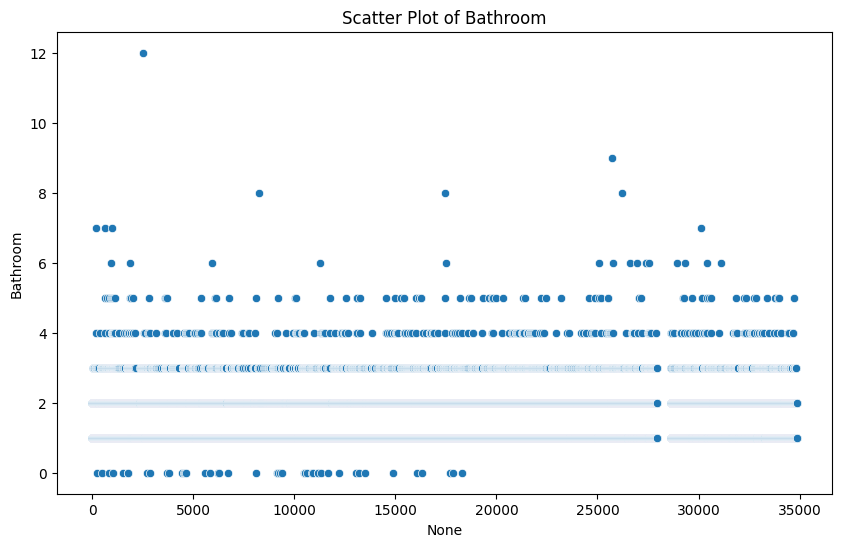

In [155]:
# Plotting scatter plot for 'Bathroom'
plot_scatter(df, 'Bathroom', 'Scatter Plot of Bathroom')


The scatter plot for the 'Bathroom' column shows that most properties have a number of bathrooms in the lower range (up to about 4), which is typical for residential properties. However, there are a few properties with a much higher number of bathrooms (up to 12), which stand out as potential outliers. These could represent large, luxurious properties or could be anomalies in the dataset.

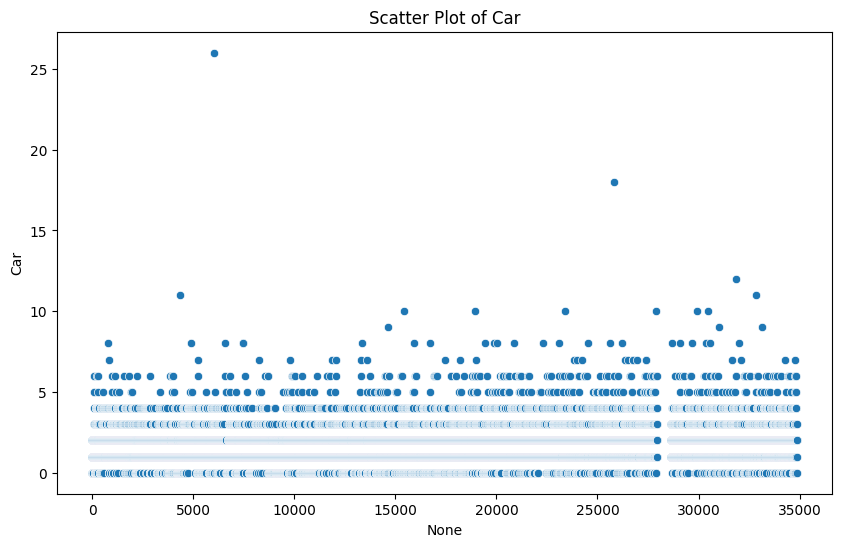

In [156]:
# Plotting scatter plot for 'Car'
plot_scatter(df, 'Car', 'Scatter Plot of Car')

The scatter plot for the 'Car' column indicates that most properties have parking space for up to about 4 cars, which is typical. However, there are some properties with significantly more parking spaces (up to 26), which are evident outliers. These outliers could be due to properties with large garages or parking facilities, or they might be data entry errors.

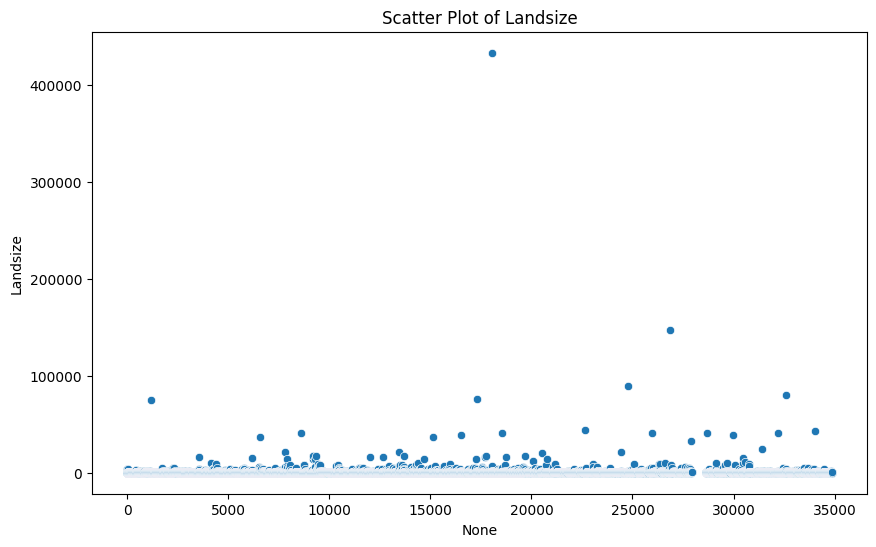

In [157]:
# Plotting scatter plot for 'Landsize'
plot_scatter(df, 'Landsize', 'Scatter Plot of Landsize')


The scatter plot for the 'Landsize' column shows that most of the properties have land sizes within a smaller range, but there are extreme values reaching up to around 433,000 square meters, which are clear outliers. These outliers could represent large agricultural or commercial properties, or they might be inaccuracies in the dataset.

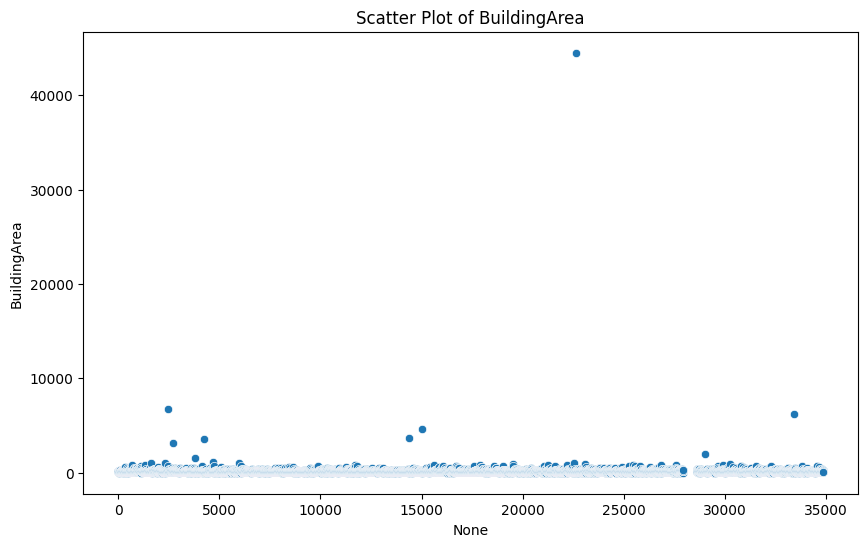

In [158]:
# Plotting scatter plot for 'BuildingArea'
plot_scatter(df, 'BuildingArea', 'Scatter Plot of BuildingArea')


The scatter plot for the 'BuildingArea' column reveals that most properties have a building area within a reasonable range, but there are some extreme values, with the highest reaching around 44,515 square meters. These extreme values are outliers and could represent large commercial buildings or errors in the dataset.

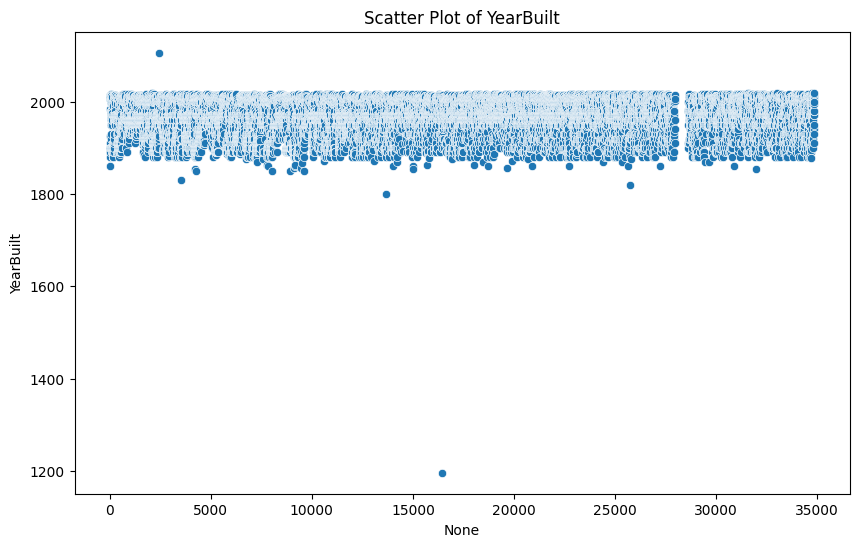

In [159]:
# Plotting scatter plot for 'YearBuilt'
plot_scatter(df, 'YearBuilt', 'Scatter Plot of YearBuilt')


The scatter plot for the 'YearBuilt' column shows that most properties were built between the late 1800s and the present day. However, there is an apparent outlier with a 'YearBuilt' value beyond the current year, which is likely a data entry error.

Before handling outliers lets check for misssing values in the data.

In [160]:
df["Rooms"]=df["Rooms"].astype(float)

From the above results we know that Room and Bedroom2 variables doesn't have a big difference, but lets check mathematically before dropping the Bedroom2 variable.

In [161]:
df['Rooms v Bedroom2'] = df['Rooms'] - df['Bedroom2']
df["Rooms v Bedroom2"].head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    1.0
7    1.0
8   -2.0
9   -1.0
Name: Rooms v Bedroom2, dtype: float64

Dropping Bedroom2 variable, since they almost represent same data.

In [162]:
df = df.drop(['Bedroom2','Rooms v Bedroom2'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34666 entries, 0 to 34856
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34666 non-null  object 
 1   Rooms          34666 non-null  float64
 2   Type           34666 non-null  object 
 3   Method         34666 non-null  object 
 4   SellerG        34666 non-null  object 
 5   Regionname     34663 non-null  object 
 6   Propertycount  34663 non-null  float64
 7   YearBuilt      15530 non-null  float64
 8   Distance       34665 non-null  float64
 9   CouncilArea    34663 non-null  object 
 10  Bathroom       26592 non-null  float64
 11  Car            26090 non-null  float64
 12  Landsize       23019 non-null  float64
 13  BuildingArea   13722 non-null  float64
 14  Price          27197 non-null  float64
dtypes: float64(9), object(6)
memory usage: 4.2+ MB


In [163]:
# Checking for missing values in the data
df.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
YearBuilt        19136
Distance             1
CouncilArea          3
Bathroom          8074
Car               8576
Landsize         11647
BuildingArea     20944
Price             7469
dtype: int64

In [164]:
#Droping NaN values of Price,since its our predictive variable we wont impute it
df.dropna(subset = ['Price'],inplace=True)
df.reset_index(drop=True,inplace=True)
df.shape

(27197, 15)

In [165]:
df.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,YearBuilt,Distance,CouncilArea,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2.0,h,S,Biggin,Northern Metropolitan,4019.0,NaN,2.5,Yarra City Council,1.0,1.0,202.0,NaN,1480000.0
1,Abbotsford,2.0,h,S,Biggin,Northern Metropolitan,4019.0,1900.0,2.5,Yarra City Council,1.0,0.0,156.0,79.0,1035000.0
2,Abbotsford,3.0,h,SP,Biggin,Northern Metropolitan,4019.0,1900.0,2.5,Yarra City Council,2.0,0.0,134.0,150.0,1465000.0
3,Abbotsford,3.0,h,PI,Biggin,Northern Metropolitan,4019.0,NaN,2.5,Yarra City Council,2.0,1.0,94.0,NaN,850000.0
4,Abbotsford,4.0,h,VB,Nelson,Northern Metropolitan,4019.0,2014.0,2.5,Yarra City Council,1.0,2.0,120.0,142.0,1600000.0


After dropping rows with missing values in the 'Price' column and resetting the index, the shape of the DataFrame is now 27,197 rows and 15 columns. 

## 7.Handling missing values by imputing median for numeric variables and mode for categorical variable ##
Imputing the numeric values with median, which is less sensitive to outliers than the mean and categorical variables with mode.
Mode imputation is a straightforward and intuitive approach to handling missing values in categorical variables. By filling the missing qualities with the most continuous classification, it guarantees that the general dissemination of classifications in the section remains moderately unaltered.

In [166]:
# Imputing median for numeric variables
numeric_cols = df.select_dtypes(include=['float']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Imputing mode for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verifying the changes
missing_values_after_imputation = df.isnull().sum()
missing_values_after_imputation


Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
YearBuilt        0
Distance         0
CouncilArea      0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

## 6. Handling outliers using Z-score method ##
Handling outliers using the Z-score is a common method in statistics. The Z-score measures how many standard deviations an element is from the mean. Generally, data points with a Z-score greater than 3 or less than -3 are considered outliers. This method is most effective for datasets that are close to a normal distribution.

To implement this, we will:

Calculate the Z-score for each numeric column.

For Positive Z-scores: It keeps rows where all Z-scores are less than 3. This means it removes rows with any Z-score greater than or equal to 3.
For Negative Z-scores: Since the absolute value of Z-scores is considered (np.abs(stats.zscore(df[numeric_cols]))), negative Z-scores are made positive, and the comparison is made against the absolute values. Therefore, a Z-score of less than -3 would also have its absolute value greater than 3 and thus would be removed. However, the code does not explicitly look for Z-scores less than -3 to remove; it's the absolute value that matters.

In simpler terms, the code removes rows where any included numeric column's value is an outlier, defined as being more than 3 standard deviations away from the mean of its respective column, regardless of whether the deviation is positive or negative.


In [167]:
from scipy import stats
# Calculating Z-scores for numeric columns
z_scores = np.abs(stats.zscore(df[numeric_cols]))

# Removing outliers: Keeping only rows where all Z-scores are less than 3
df= df[(z_scores < 3).all(axis=1)]

# Shape of the DataFrame after removing outliers
new_shape = df.shape
new_shape

(24398, 15)

After removing rows where any numeric column has a Z-score greater than 3 or less than -3, the shape of the DataFrame is now 24,398 rows and 15 columns. This indicates that several rows identified as outliers based on the Z-score criteria have been removed from the dataset.

In [168]:
# Calculate summary statistics
print(df.describe())

              Rooms  Propertycount     YearBuilt      Distance      Bathroom  \
count  24398.000000   24398.000000  24398.000000  24398.000000  24398.000000   
mean       2.931880    7104.079064   1969.902082     10.818850      1.408025   
std        0.897474    3832.401178     21.448028      5.731835      0.586534   
min        1.000000     121.000000   1895.000000      0.000000      0.000000   
25%        2.000000    4217.000000   1970.000000      6.400000      1.000000   
50%        3.000000    6482.000000   1970.000000     10.300000      1.000000   
75%        3.000000    9704.000000   1970.000000     14.000000      2.000000   
max        5.000000   17496.000000   2019.000000     31.600000      3.000000   

                Car      Landsize  BuildingArea         Price  
count  24398.000000  24398.000000  24398.000000  2.439800e+04  
mean       1.733585    499.277318    137.476502  1.000374e+06  
std        0.742668    427.899991     48.541362  5.010022e+05  
min        0.000000    

## 8.Bivariate analysis using Correlation Matrix ##

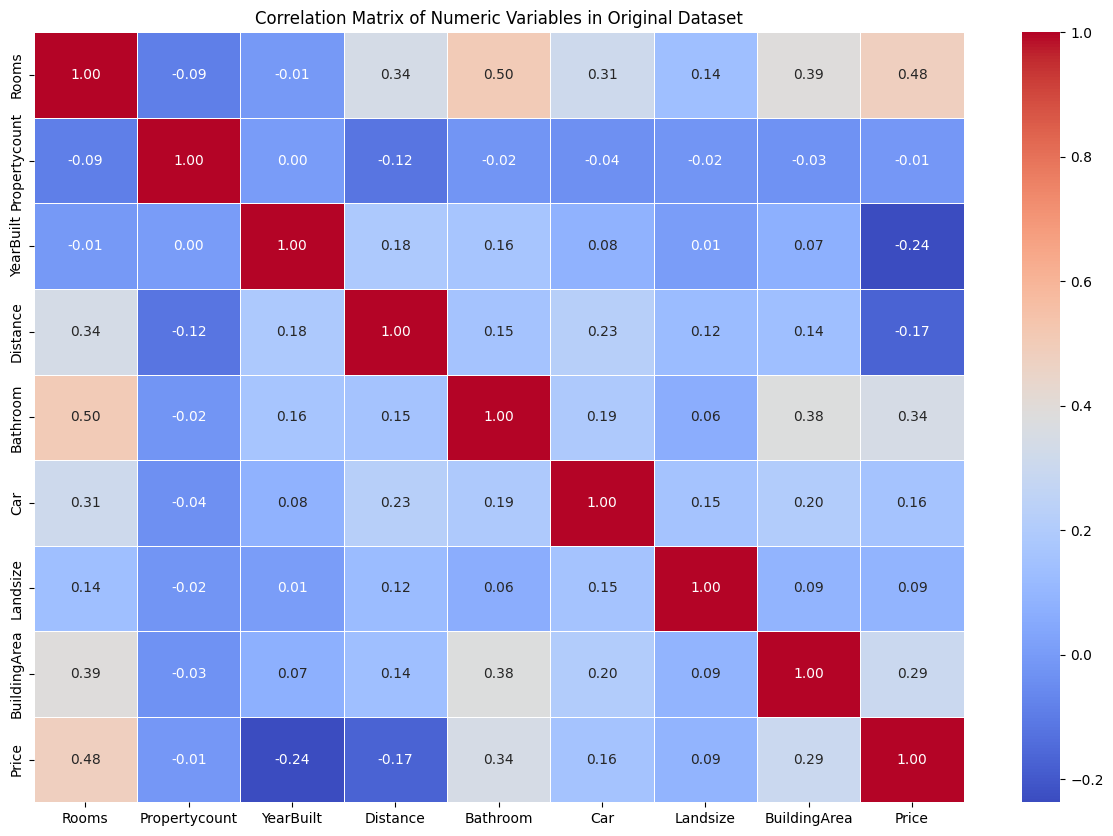

In [169]:
# Calculating the correlation matrix for the original dataset 'df' excluding categorical variables
correlation_matrix_original = df.select_dtypes(include=['number']).corr()

# Setting up the matplotlib figure
plt.figure(figsize=(15, 10))

# Drawing the heatmap for the correlation matrix of the original dataset
sns.heatmap(correlation_matrix_original, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Adding title
plt.title("Correlation Matrix of Numeric Variables in Original Dataset")

# Showing the plot
plt.show()


The heatmap above displays the correlation matrix for the numeric variables in the dataset. Here's an interpretation of some key findings:

Price and Rooms: There's a moderately positive correlation between 'Price' and 'Rooms'. This suggests that as the number of rooms in a property increases, its price tends to increase as well.
Price and Distance: 'Price' has a negative correlation with 'Distance', indicating that properties further away from the city center might generally have lower prices.
Landsize and BuildingArea: These two variables have a positive correlation, though not very strong. This is logical as larger land sizes can often accommodate larger buildings.
YearBuilt and Price: There is a slight negative correlation, suggesting that newer properties might be priced higher than older ones, although this relationship is not very strong.
Bathroom, BuildingArea, Car, Distance and Rooms, : These variables have positive correlations with each other, which is expected as larger properties tend to have more bathrooms, Rooms, High BuildingArea, and car spaces.
Propertycount: This variable does not show a significant correlation with most other variables.

## 8. Bivariate analysis using scatterplot ##

The scatter plots for all numeric variables against 'Price'(dependent variable) provide a comprehensive overview of their relationships:

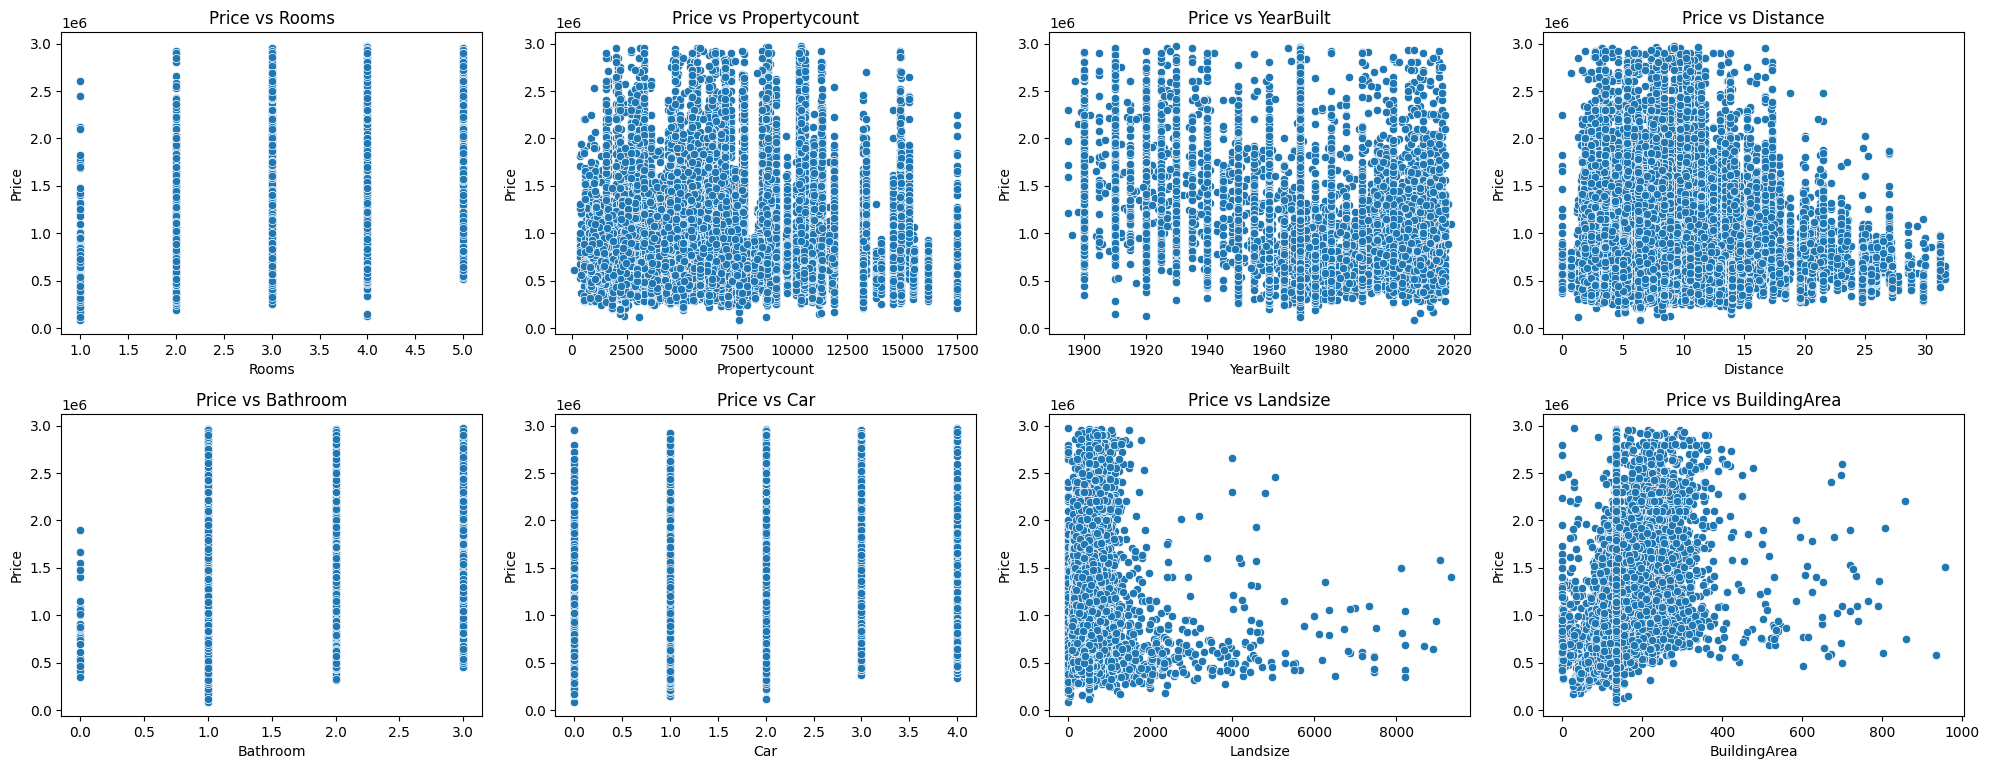

In [170]:
# Plotting scatter plots for all numeric variables against 'Price'

# Selecting numeric variables (excluding 'Price' itself for the scatter plots)
numeric_vars_for_scatter = df.select_dtypes(include=['number']).drop('Price', axis=1).columns

# Creating scatter plots
plt.figure(figsize=(20, 15))
for i, var in enumerate(numeric_vars_for_scatter, 1):
    plt.subplot(4, 4, i)
    sns.scatterplot(x=df[var], y=df['Price'])
    plt.title(f'Price vs {var}')

plt.tight_layout()
plt.show()


Rooms, Bathroom, Car: These show positive trends with 'Price', indicating that as the number of rooms, bathrooms, or car spaces increases, the price tends to increase. However, the relationships are not strictly linear.
Distance: Shows a negative trend with 'Price', reinforcing the observation that properties further from the city center tend to have lower prices.
Landsize, BuildingArea: The relationships are scattered, suggesting that larger land sizes or building areas do not consistently equate to higher prices. Non-linear patterns are evident.
YearBuilt: The relationship is not distinctly clear, suggesting that the year a property was built does not have a straightforward impact on its price.
Given these observations, it appears that certain variables may benefit from transformations to better capture their relationship with 'Price'. Logarithmic or square root transformations could be suitable for variables like 'Landsize' and 'BuildingArea' due to their scattered and non-linear patterns.


## 10. Handling Qualitative data (Categorical Variables) ##
Convert Categorical Variables to Dummy Variables:
We will use pd.get_dummies() to convert categorical variables in the dataset into dummy variables. This is essential for including these variables in linear regression models.

In [171]:
# Convert categorical variables to dummy variables
df_categorical = df.select_dtypes(include=['object'])
df_dummies = pd.get_dummies(df_categorical)

# Convert the dummy variables to integer type
df_dummies = df_dummies.astype(int)


# Combine the dummy variables with the numeric variables from df
df_combined = pd.concat([df.select_dtypes(include=['number']), df_dummies], axis=1)
print (df_combined)

       Rooms  Propertycount  YearBuilt  Distance  Bathroom  Car  Landsize  \
0        2.0         4019.0     1970.0       2.5       1.0  1.0     202.0   
1        2.0         4019.0     1900.0       2.5       1.0  0.0     156.0   
2        3.0         4019.0     1900.0       2.5       2.0  0.0     134.0   
3        3.0         4019.0     1970.0       2.5       2.0  1.0      94.0   
4        4.0         4019.0     2014.0       2.5       1.0  2.0     120.0   
...      ...            ...        ...       ...       ...  ...       ...   
27192    4.0         6543.0     1970.0       6.3       1.0  3.0     593.0   
27193    2.0         6543.0     2018.0       6.3       2.0  1.0      98.0   
27194    2.0         6543.0     2000.0       6.3       1.0  2.0     220.0   
27195    3.0         6543.0     1970.0       6.3       1.0  2.0     512.0   
27196    2.0         6543.0     1930.0       6.3       1.0  0.0     250.0   

       BuildingArea      Price  Suburb_Abbotsford  ...  \
0             133

In [172]:
df_combined.shape

(24398, 673)

In [173]:
continuous_vars = ['Rooms', 'Propertycount', 'YearBuilt', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea']


In [174]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#'Price' is the target variable included in df_combined
y = df_combined['Price']
X = df_combined.drop('Price', axis=1)

# Now that X is defined, scale the continuous variables
scaler = StandardScaler()
X_scaled_continuous = scaler.fit_transform(X[continuous_vars])

# Convert the scaled continuous variables back into a DataFrame
df_scaled_continuous = pd.DataFrame(X_scaled_continuous, columns=continuous_vars, index=X.index)

# Drop the original, unscaled continuous variables from X
X = X.drop(columns=continuous_vars)

# Concatenate the scaled continuous variables back with the rest of X
X_final = pd.concat([X, df_scaled_continuous], axis=1)

# Now you can split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)


In [175]:
X_train.shape

(17078, 672)

In [176]:
X_test.shape

(7320, 672)

In [177]:
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)


In [178]:
y_pred[:5]

array([ 416384.,  747136., 1087360., 1333376.,  457856.])

In [179]:
y_train[:5]

26980    1100000.0
24944    1250000.0
14941     688000.0
4017     1300000.0
25085     500000.0
Name: Price, dtype: float64

In [180]:
model.score(X_train, y_train)

0.7383815784998622

In [181]:
model.score(X_test, y_test)

-5.827195407670778e+20

In [182]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


RMSE: 1.2107062822539718e+16
MAE: 825485824796233.9


We can clearly see that the score for the training data is 73% whereas the score of the training data is -5.1%(This means our Model is overfit)

Let Use Lasso (L1 Regularized) Regression Model

Lasso == L1 Regularization

In [183]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(X_train, y_train)  #Trainig our data (train) using lasso regression(L1)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [184]:

lasso_reg.score(X_test, y_test)  #Score of the testing data

0.739576733228517

In [185]:
lasso_reg.score(X_train, y_train)  #Score of the training data

0.7345794194250819

In [186]:
# Make predictions on the testing set
lasso_y_pred = model.predict(X_test)

In [187]:
lasso_y_pred[:10]

array([ 416384.,  747136., 1087360., 1333376.,  457856., 1378816.,
        717568., 1079552.,  739584., 1076480.])

In [188]:
y_train[:10]

26980    1100000.0
24944    1250000.0
14941     688000.0
4017     1300000.0
25085     500000.0
15680    1280000.0
26814     650000.0
7548     1000000.0
8117     1330000.0
13551    1150000.0
Name: Price, dtype: float64

In [189]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE and MAE
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred))
mae_lasso = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse_lasso}")
print(f"MAE: {mae_lasso}")

RMSE: 1.2107062822539718e+16
MAE: 825485824796233.9


Let Use Ridge (L2 Regularized) Regression Model

Ridge == L2 Regularization

In [190]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=50,max_iter=100,tol=0.1)
ridge_reg.fit(X_train, y_train) #Training our data using Ridge Regression(L2)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [191]:
ridge_reg.score(X_train, y_train)  #Score of the training data

0.7228694626924947

In [192]:
ridge_reg.score(X_test, y_test)  #Score of the testing data

0.7287597317029291

In [193]:
# Predict on the testing set
ridge_y_pred = ridge_reg.predict(X_test)

In [194]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE and MAE
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred))
mae_ridge = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse_ridge}")
print(f"MAE: {mae_ridge}")

RMSE: 1.2107062822539718e+16
MAE: 825485824796233.9


References:

Kaggle. (2019). Melbourne Housing Market [Data set]. https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market